In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('loan_data.csv')

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
print(df.describe())

         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000  

In [ ]:
print('\nDescriptive Statistics for Categorical Columns:')
display(df.describe(include='object'))


Descriptive Statistics for Categorical Columns:


,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


The dataset contains the following columns:

*   **`person_age`**: Age of the loan applicant.
*   **`person_gender`**: Gender of the loan applicant.
*   **`person_education`**: Education level of the loan applicant.
*   **`person_income`**: Annual income of the loan applicant.
*   **`person_emp_exp`**: Employment experience (in years) of the loan applicant.
*   **`person_home_ownership`**: Home ownership status of the loan applicant.
*   **`loan_amnt`**: The amount of loan applied for.
*   **`loan_intent`**: The purpose for which the loan is intended (e.g., medical, education, personal).
*   **`loan_int_rate`**: The interest rate of the loan.
*   **`loan_percent_income`**: The loan amount as a percentage of the applicant's income.
*   **`cb_person_cred_hist_length`**: Length of the credit history (in years) of the loan applicant.
*   **`credit_score`**: Credit score of the loan applicant.
*   **`previous_loan_defaults_on_file`**: Indicates whether the applicant has previous loan defaults on file.
*   **`loan_status`**: The status of the loan (e.g., approved/rejected, often represented as 0 or 1).

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Analyze Target Distribution



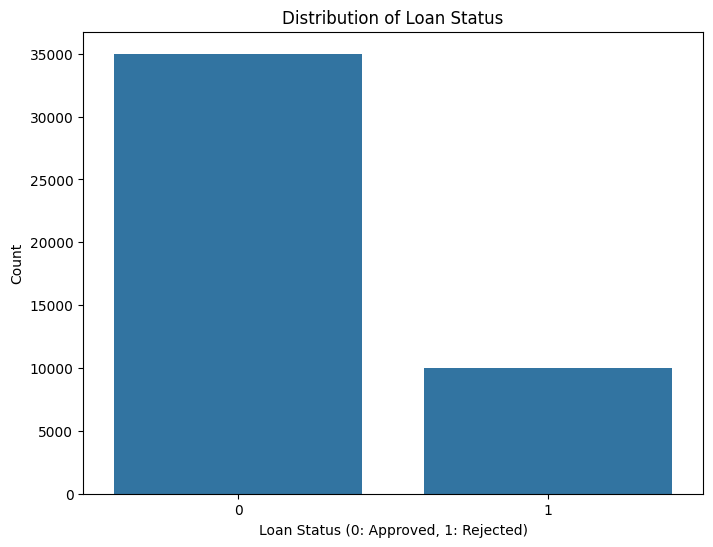

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Approved, 1: Rejected)')
plt.ylabel('Count')
plt.show()

## Categorical Features vs. Target



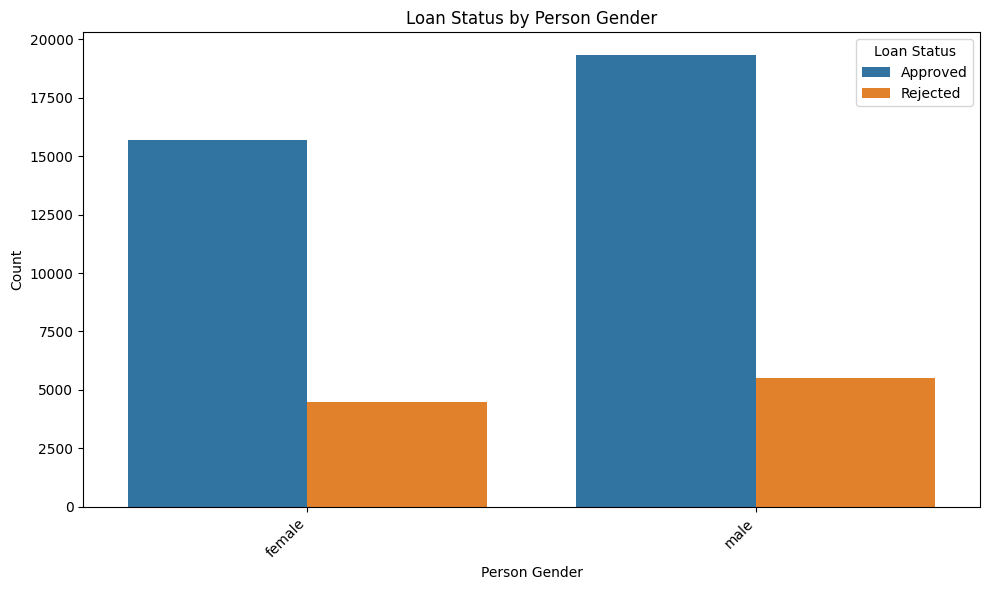

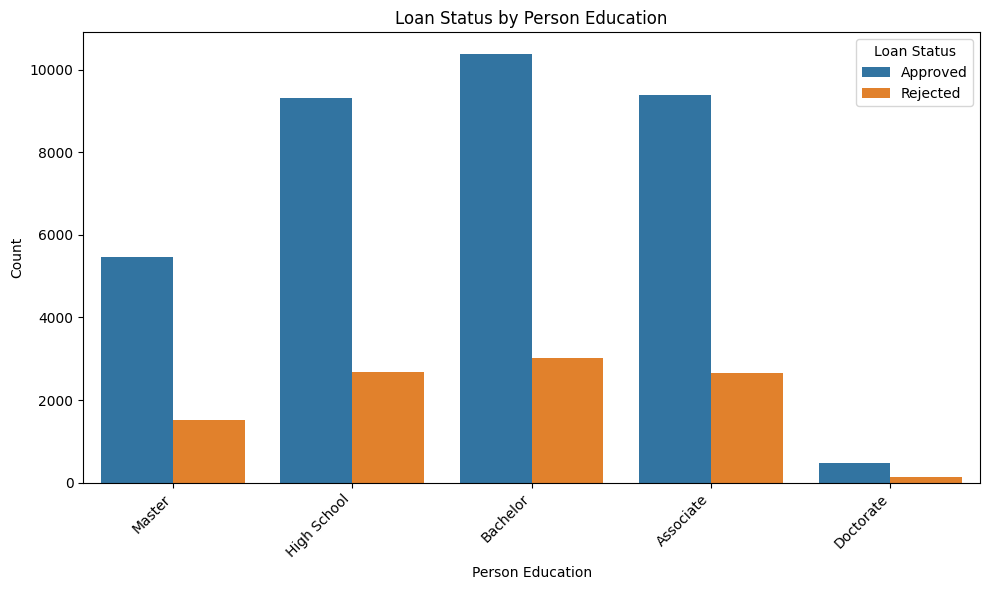

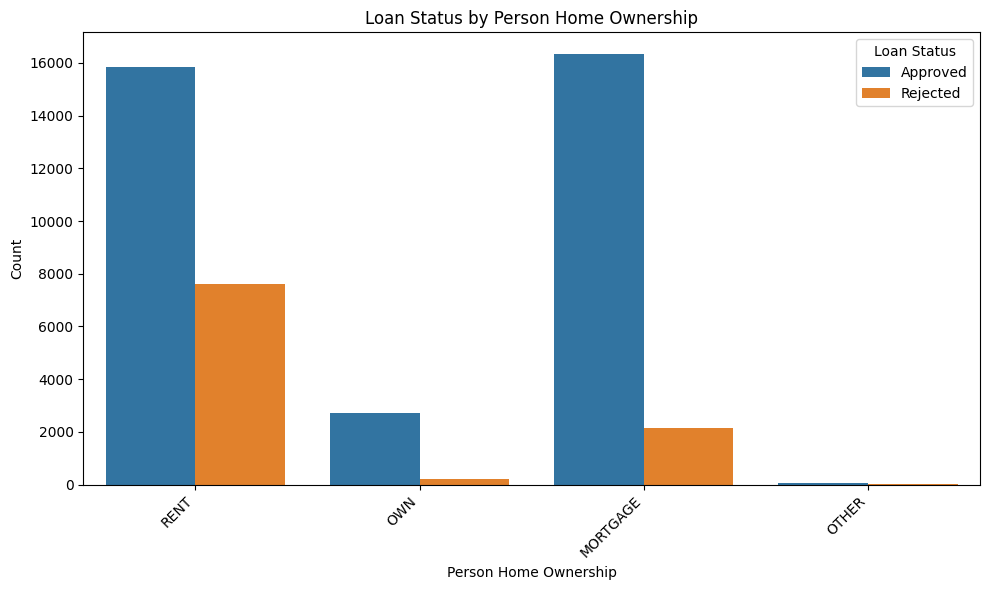

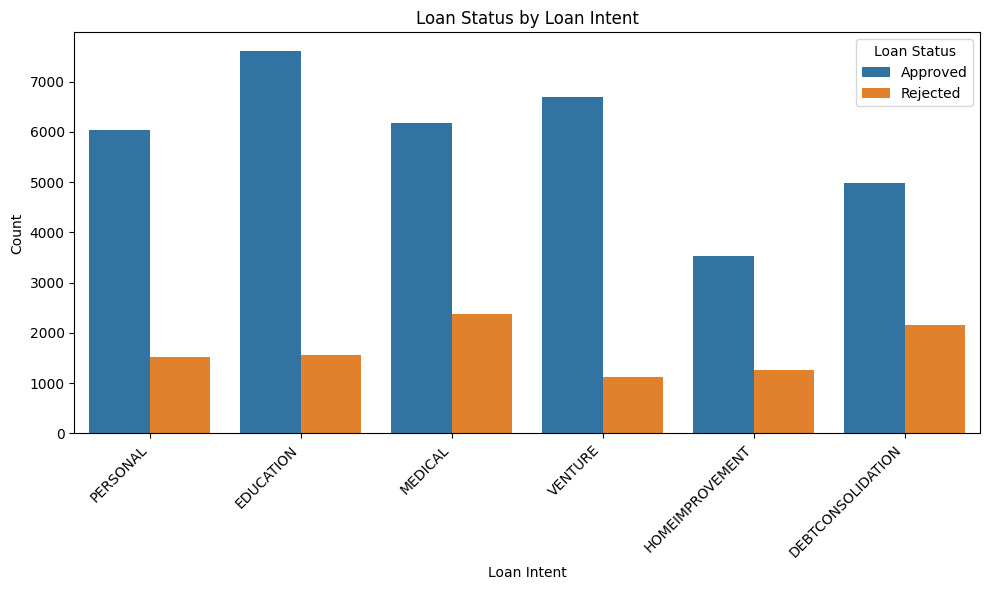

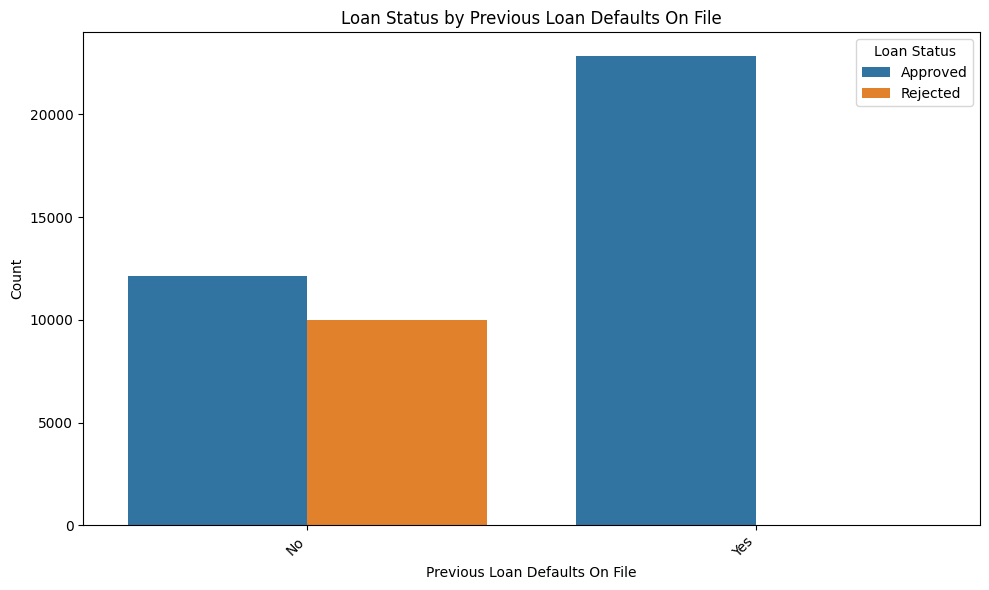

In [ ]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f'Loan Status by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend(title='Loan Status', labels=['Approved', 'Rejected'])
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

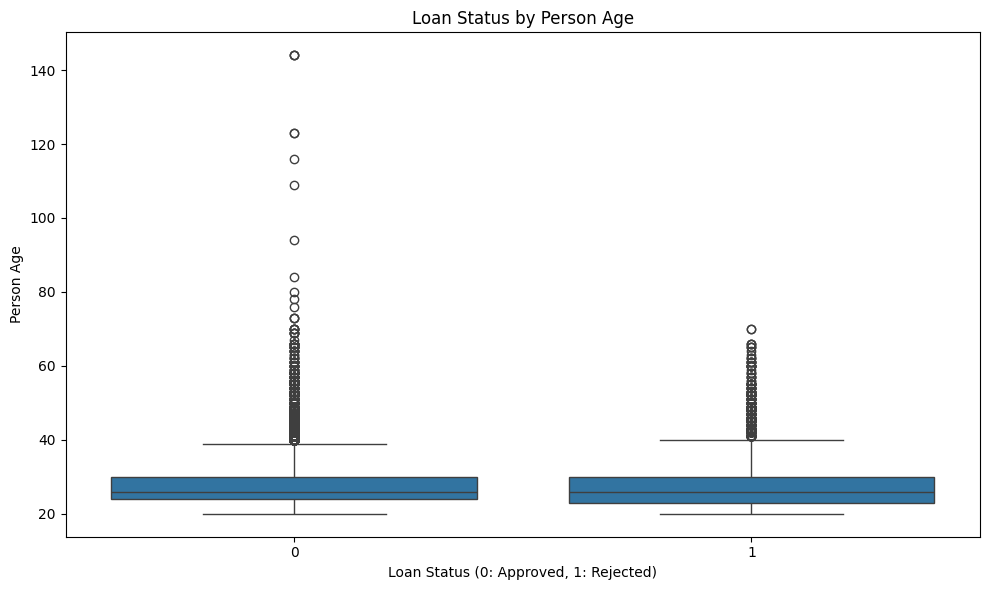

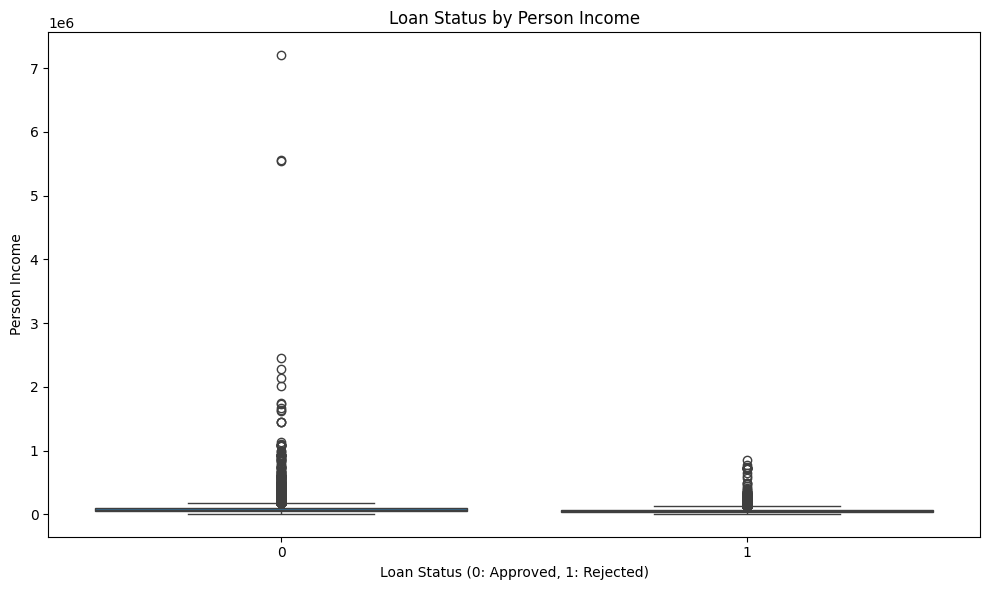

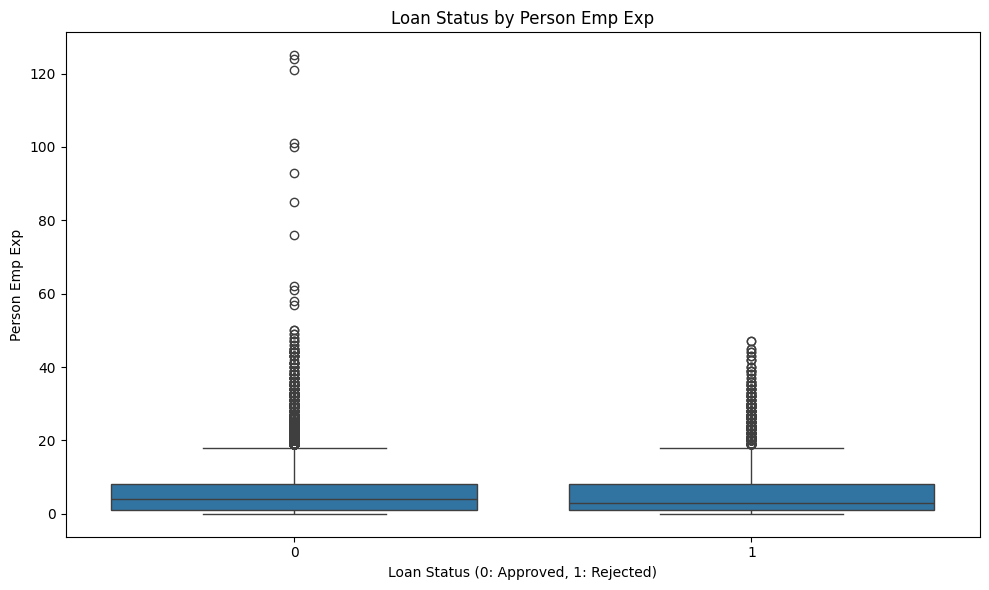

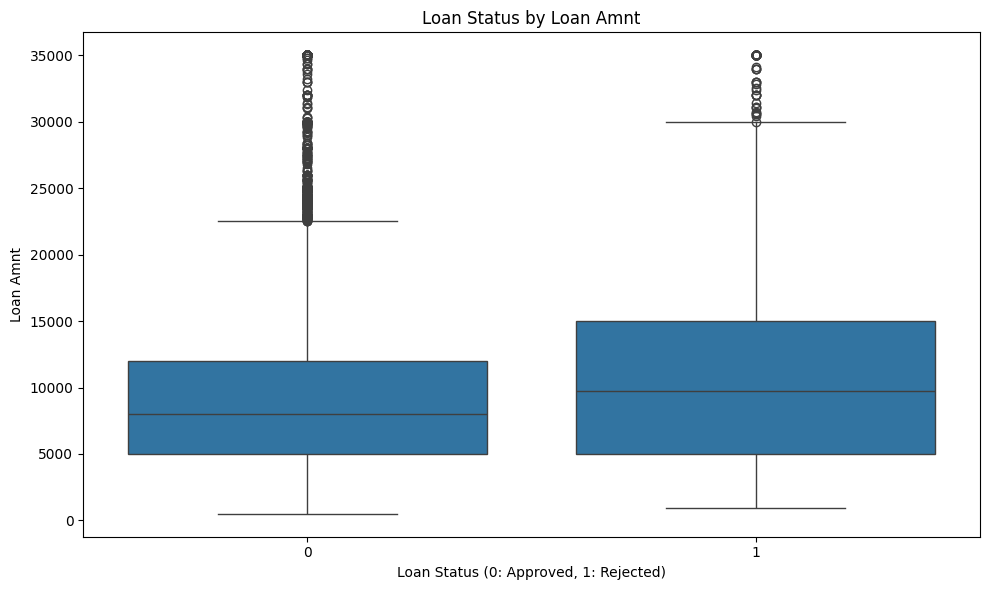

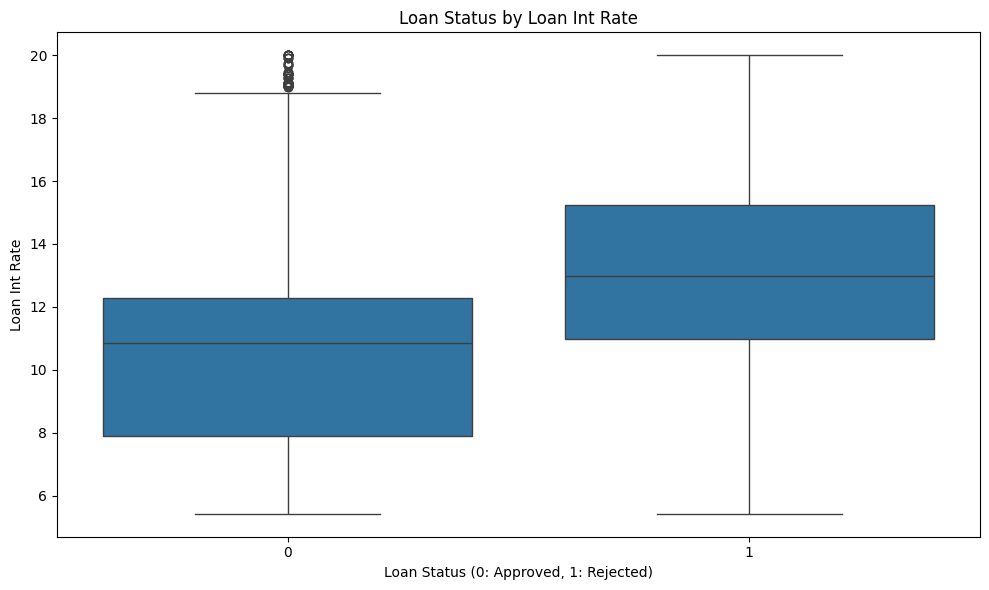

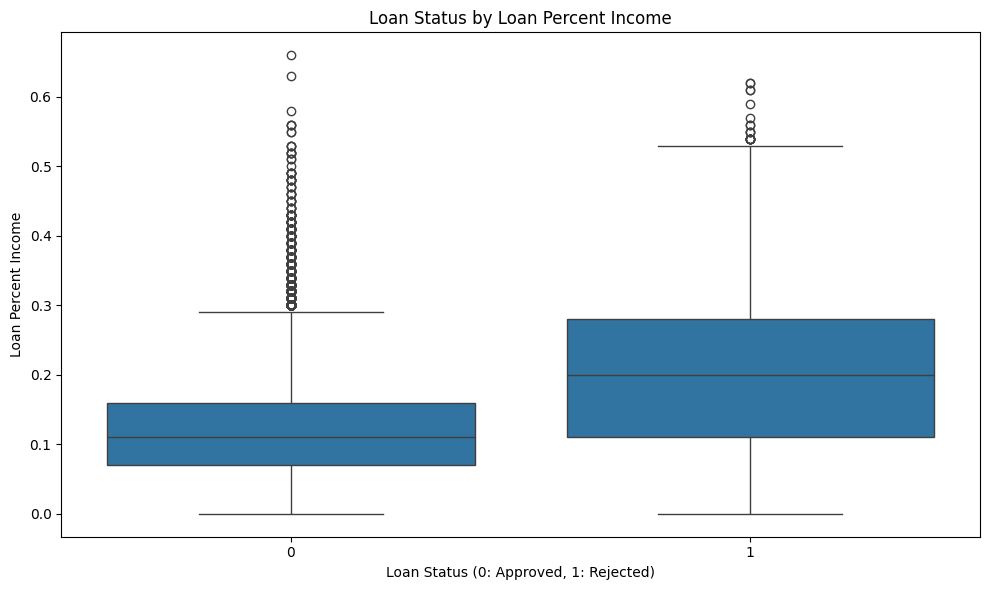

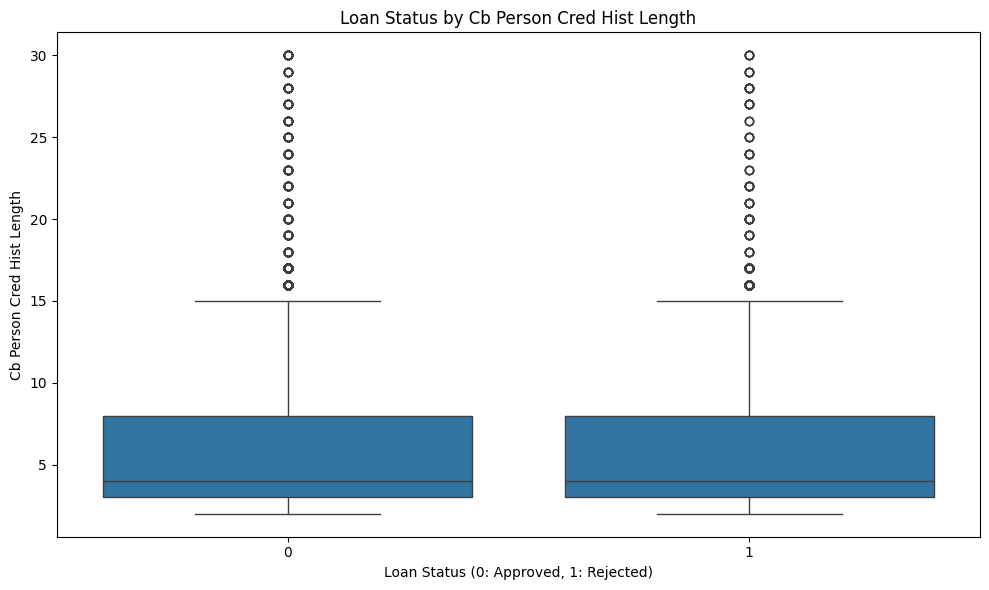

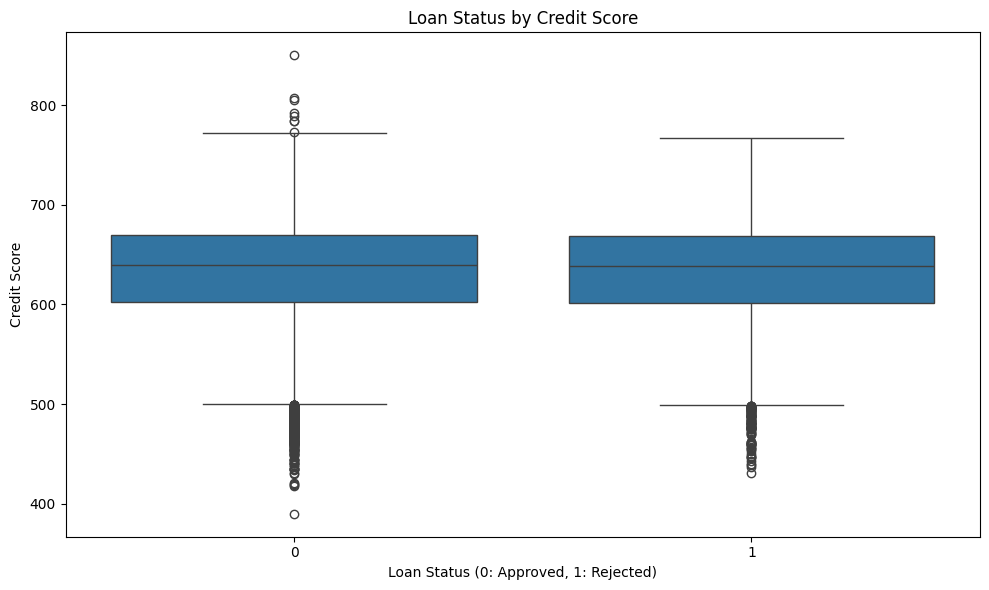

In [ ]:
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'Loan Status by {col.replace("_", " ").title()}')
    plt.xlabel('Loan Status (0: Approved, 1: Rejected)')
    plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

## Correlation Matrix of Numerical Features



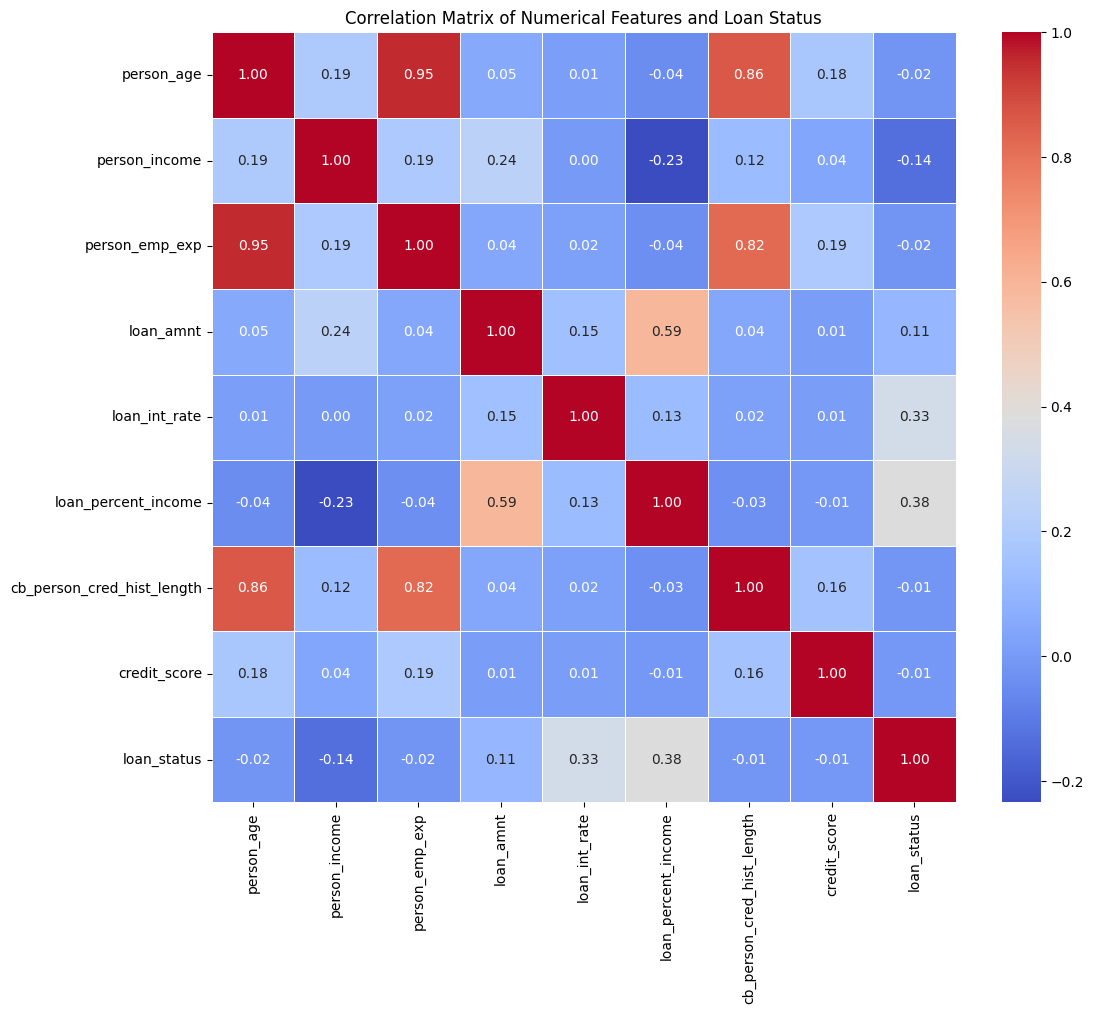

In [ ]:
numerical_cols_with_target = numerical_cols + ['loan_status']
correlation_matrix = df[numerical_cols_with_target].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Loan Status')
plt.show()

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df = pd.read_csv('loan_data.csv')
print("Original 'df' DataFrame loaded successfully.")

Original 'df' DataFrame loaded successfully.


## Identify Categorical Columns for Encoding



In [ ]:
one_hot_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']
label_encode_col = 'previous_loan_defaults_on_file'

print(f"Columns for One-Hot Encoding: {one_hot_cols}")
print(f"Column for Label Encoding: {label_encode_col}")

Columns for One-Hot Encoding: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']
Column for Label Encoding: previous_loan_defaults_on_file


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding
le = LabelEncoder()
df_encoded[label_encode_col] = le.fit_transform(df_encoded[label_encode_col])

print("DataFrame after encoding:")
display(df_encoded.head())

DataFrame after encoding:


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,...,False,True,False,False,True,False,False,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,...,True,False,False,True,False,True,False,False,False,False
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,...,True,False,False,False,False,False,False,True,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,...,False,False,False,False,True,False,False,True,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (45000, 22)
Target (y) shape: (45000,)


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_income                   45000 non-null  float64
 2   person_emp_exp                  45000 non-null  int64  
 3   loan_amnt                       45000 non-null  float64
 4   loan_int_rate                   45000 non-null  float64
 5   loan_percent_income             45000 non-null  float64
 6   cb_person_cred_hist_length      45000 non-null  float64
 7   credit_score                    45000 non-null  int64  
 8   previous_loan_defaults_on_file  45000 non-null  int64  
 9   loan_status                     45000 non-null  int64  
 10  person_gender_male              45000 non-null  bool   
 11  person_education_Bachelor       45000 non-null  bool   
 12  person_education_Doctorate      

In [ ]:
df_encoded = df_encoded.astype(int)

In [ ]:
df_encoded

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,71948,0,35000,16,0,3,561,0,1,...,0,1,0,0,1,0,0,0,1,0
1,21,12282,0,1000,11,0,2,504,1,0,...,1,0,0,1,0,1,0,0,0,0
2,25,12438,3,5500,12,0,3,635,0,1,...,1,0,0,0,0,0,0,1,0,0
3,23,79753,0,35000,15,0,2,675,0,1,...,0,0,0,0,1,0,0,1,0,0
4,24,66135,1,35000,14,0,4,586,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,47971,6,15000,15,0,3,645,0,1,...,0,0,0,0,1,0,0,1,0,0
44996,37,65800,17,9000,14,0,11,621,0,1,...,0,0,0,0,1,0,1,0,0,0
44997,33,56942,7,2771,10,0,10,668,0,1,...,0,0,0,0,1,0,0,0,0,0
44998,29,33164,4,12000,13,0,6,604,0,1,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
x = df_encoded.drop('loan_status', axis= 1)
y = df_encoded['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8025555555555556
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6990
           1       0.64      0.26      0.37      2010

    accuracy                           0.80      9000
   macro avg       0.73      0.61      0.63      9000
weighted avg       0.78      0.80      0.77      9000

[[6692  298]
 [1479  531]]


In [ ]:
print(numerical_cols)

['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [ ]:
print(f"Shape of DataFrame before outlier removal: {df_encoded.shape}")

Shape of DataFrame before outlier removal: (45000, 23)


In [ ]:
print(f"Shape of DataFrame before outlier removal (filtering): {df_encoded.shape}")

outlier_mask = pd.Series([False] * len(df_encoded), index=df_encoded.index)

for col in numerical_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update the mask for rows that are outliers in the current column
    outlier_mask = outlier_mask | ((df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound))

# Filter the DataFrame to keep only non-outlier rows
df_encoded = df_encoded[~outlier_mask].copy() # Assign back to df_encoded

print("Outliers removed from numerical columns by filtering rows.")
print(f"Shape of DataFrame after outlier removal (filtering): {df_encoded.shape}")

Shape of DataFrame before outlier removal (filtering): (45000, 23)
Outliers removed from numerical columns by filtering rows.
Shape of DataFrame after outlier removal (filtering): (37992, 23)


In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Data successfully re-split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Data successfully re-split into training and testing sets.
X_train shape: (30393, 22)
X_test shape: (7599, 22)


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes model re-trained successfully with cleaned data.")

Gaussian Naive Bayes model re-trained successfully with cleaned data.


In [ ]:
y_pred = nb_model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8436636399526254

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      5974
           1       0.75      0.40      0.52      1625

    accuracy                           0.84      7599
   macro avg       0.80      0.68      0.71      7599
weighted avg       0.83      0.84      0.82      7599


Confusion Matrix:
 [[5761  213]
 [ 975  650]]
